In [1]:
import pandas as pd
# Libraries

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))
import os
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
df = pd.read_csv("final_data_api.csv")

In [3]:
temp_df = df.copy()

In [4]:
temp_df.head()

,imdb_id,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,primaryTitle,originalTitle,startYear,runtimeMinutes,genres_x,world_revenue,averageRating,numVotes,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres_y,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,success,status_code,status_message,MPAA
0,tt0010180,NaN,NaN,NaN,NaN,NaN,NaN,nm0895048,NaN,nm13054604,NaN,"nm0449292,nm0501924,nm0873654",NaN,Godovshchina revolyutsii,Godovshchina revolyutsii,1918,119,Documentary,9685.0,6.8,112,0,False,/gpCMKdHDiY17GErwkfOyMNRvNOS.jpg,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}, {'id': 36,...",NaN,384814.0,ru,Годовщина революции,The history of the October revolution told in ...,0.600,/uEnlJPJiT9ldmMK7yQSfWVivcFZ.jpg,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1918-02-27,9685.0,119.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Anniversary of the Revolution,False,7.1,5.0,NaN,NaN,NaN,NaN
1,tt0010323,"nm0470328,nm0891998,nm0270415",nm0196820,NaN,NaN,NaN,"nm0110640,nm0031350,nm0005959",nm0927468,NaN,NaN,NaN,NaN,"nm0562346,nm0417917",The Cabinet of Dr. Caligari,Das Cabinet des Dr. Caligari,1920,76,"Horror,Mystery,Thriller",8811.0,8.0,62554,16,False,/m0N89MIIu6qYZcujCRzBHrkZbns.jpg,NaN,18000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,234.0,de,Das Cabinet des Dr. Caligari,"Francis, a young man, recalls in his memory th...",13.553,/myK9DeIsXWGKgUTZyGXg2IfFk0W.jpg,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1920-02-27,8811.0,77.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,You must become Caligari!,The Cabinet of Dr. Caligari,False,8.0,1127.0,NaN,NaN,NaN,NaN
2,tt0011440,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,nm0774256,nm0357165,NaN,NaN,NaN,NaN,NaN,nm0359105,Markens grøde,Markens grøde,1921,107,Drama,4272.0,6.5,236,31,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,36126.0,no,Markens grøde,"In rural Norway in the early 20th century, th...",1.208,/nzkFnh0dffiAiysvAanHPUOGyOT.jpg,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...","[{'iso_3166_1': 'NO', 'name': 'Norway'}]",1921-12-02,0.0,107.0,[],Released,NaN,Growth of the Soil,False,6.0,9.0,NaN,NaN,NaN,NaN
3,tt0012190,"nm0884388,nm0134251,nm0842522",nm0855935,NaN,NaN,NaN,nm0002301,nm0002271,NaN,"nm0002206,nm0318647",NaN,NaN,"nm0087658,nm0558923",The Four Horsemen of the Apocalypse,The Four Horsemen of the Apocalypse,1921,150,"Drama,Romance,War",9183673.0,7.2,3342,40,False,/obDuU0T434xZbTv70H8JfF4xCBe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,31432.0,en,The Four Horsemen of the Apocalypse,Set in the years before and during World War I...,3.957,/262nYFe45BxX22M9TPhB4BwEqby.jpg,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...","[{'iso_3166_1': 'US', 'name': 'United States o...",1921-03-06,0.0,132.0,[],Released,NaN,The Four Horsemen of the Apocalypse,False,7.0,34.0,NaN,NaN,NaN,NaN
4,tt0012349,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Kid,The Kid,1921,68,"Comedy,Drama,Family",41960.0,8.3,124464,53,False,/cvWzCDo3pQyoasvqzRIP7oHK3qn.jpg,NaN,250000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,10098.0,en,The Kid,A tramp cares for a boy after he's abandoned a...,8.892,/drgMcyTsySQBnUPGaBThCHGdlWT.jpg,"[{'id': 1315, 'logo_path': None, 'name': 'Char...","[{'iso_3166_1': 'US', 'name': 'United States o...",1921-01-21,2500000.0,53.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,6 reels of Joy.,The Kid,False,8.2,1599.0,NaN,NaN,NaN,NaN


In [5]:
temp_df.shape

(43151, 50)

In [6]:
temp_df.isna().sum() / temp_df.shape[0] >0.3

imdb_id                  False
actor                    False
actress                  False
archive_footage           True
archive_sound             True
cinematographer           True
composer                  True
director                 False
editor                    True
producer                 False
production_designer       True
self                      True
writer                    True
primaryTitle             False
originalTitle            False
startYear                False
runtimeMinutes           False
genres_x                 False
world_revenue            False
averageRating            False
numVotes                 False
Unnamed: 0               False
adult                    False
backdrop_path            False
belongs_to_collection     True
budget                   False
genres_y                 False
homepage                  True
id                       False
original_language        False
original_title           False
overview                 False
populari

In [7]:
temp_df = temp_df.drop(columns='Unnamed: 0', axis=1)

In [8]:
temp_df = temp_df.drop(columns=['success', 'status_code', 'status_message', 'archive_footage', 'archive_sound', 'imdb_id'], axis=1)

In [9]:
un_important = ['cinematographer', 'composer', 'production_designer', 'self', 'writer', 'homepage', 'editor']

In [10]:
temp_df = temp_df.drop(columns=un_important, axis=1)

In [11]:
temp_df = temp_df.drop(columns=['primaryTitle','id','original_title','tagline','title','overview', 'video', 'revenue', 'vote_count', 'adult', 'startYear','backdrop_path','numVotes','genres_y','poster_path','production_countries','spoken_languages','status'], axis=1)

In [12]:
temp_df = temp_df.drop(columns=['originalTitle','runtimeMinutes'], axis=1)

In [13]:
temp_df.isna().sum() / temp_df.shape[0] > 0.3

actor                    False
actress                  False
director                 False
producer                 False
genres_x                 False
world_revenue            False
averageRating            False
belongs_to_collection     True
budget                   False
original_language        False
popularity               False
production_companies     False
release_date             False
runtime                  False
vote_average             False
MPAA                      True
dtype: bool

In [489]:
# belong to collection
#temp_df = temp_df.drop(['belongs_to_collection'], axis=1)

In [14]:
temp_df = temp_df.drop(['MPAA'], axis=1)


In [491]:
temp_df['belongs_to_collection'].isna().sum() / temp_df.shape[0] # 90 % from data is missing

0.899515654330143

In [492]:
#temp_df['belongs_to_collection'] = temp_df['belongs_to_collection'].apply(ast.literal_eval)# .. can't apply it with na value

In [494]:
#work_df = work_dff.dropna()

In [495]:
work_df

,actor,actress,director,producer,genres_x,world_revenue,averageRating,belongs_to_collection,budget,original_language,popularity,production_companies,release_date,runtime,vote_average
0,NaN,NaN,nm0895048,nm13054604,Documentary,9685.0,6.8,NaN,0.0,ru,0.600,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...",1918-02-27,119.0,7.1
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,"Horror,Mystery,Thriller",8811.0,8.0,NaN,18000.0,de,13.553,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...",1920-02-27,77.0,8.0
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,Drama,4272.0,6.5,NaN,0.0,no,1.208,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...",1921-12-02,107.0,6.0
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647","Drama,Romance,War",9183673.0,7.2,NaN,0.0,en,3.957,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...",1921-03-06,132.0,7.0
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,"Comedy,Drama,Family",41960.0,8.3,NaN,250000.0,en,8.892,"[{'id': 1315, 'logo_path': None, 'name': 'Char...",1921-01-21,53.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,Animation,83857.0,7.0,NaN,0.0,ms,0.600,[],2019-05-09,100.0,6.9
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,"Comedy,Drama",40772.0,6.8,NaN,0.0,sv,2.955,"[{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...",2020-02-21,110.0,6.4
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619","Comedy,Drama",236880.0,6.6,NaN,0.0,fr,5.048,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",2020-07-15,81.0,7.0
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785","Action,Crime,Horror",23101.0,6.1,NaN,0.0,en,7.997,"[{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...",2019-09-21,92.0,5.9



# Belong To Collection

In [496]:
work_df['belongs_to_collection']=work_df['belongs_to_collection'].fillna('{}')

In [497]:
work_df['belongs_to_collection'].isna().sum()

0

In [498]:
#work_df = work_df.dropna()

In [499]:
work_df['belongs_to_collection'] = work_df['belongs_to_collection'].apply(ast.literal_eval)

In [500]:
work_df

,actor,actress,director,producer,genres_x,world_revenue,averageRating,belongs_to_collection,budget,original_language,popularity,production_companies,release_date,runtime,vote_average
0,NaN,NaN,nm0895048,nm13054604,Documentary,9685.0,6.8,{},0.0,ru,0.600,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...",1918-02-27,119.0,7.1
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,"Horror,Mystery,Thriller",8811.0,8.0,{},18000.0,de,13.553,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...",1920-02-27,77.0,8.0
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,Drama,4272.0,6.5,{},0.0,no,1.208,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...",1921-12-02,107.0,6.0
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647","Drama,Romance,War",9183673.0,7.2,{},0.0,en,3.957,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...",1921-03-06,132.0,7.0
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,"Comedy,Drama,Family",41960.0,8.3,{},250000.0,en,8.892,"[{'id': 1315, 'logo_path': None, 'name': 'Char...",1921-01-21,53.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,Animation,83857.0,7.0,{},0.0,ms,0.600,[],2019-05-09,100.0,6.9
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,"Comedy,Drama",40772.0,6.8,{},0.0,sv,2.955,"[{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...",2020-02-21,110.0,6.4
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619","Comedy,Drama",236880.0,6.6,{},0.0,fr,5.048,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",2020-07-15,81.0,7.0
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785","Action,Crime,Horror",23101.0,6.1,{},0.0,en,7.997,"[{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...",2019-09-21,92.0,5.9


In [501]:
#temp_dff = temp_df.dropna().reset_index(drop=True)

In [502]:
work_df.shape

(43151, 15)

In [503]:
# tempdf_ = temp_df.dropna().reset_index(drop=True) .. if you drop na now

In [504]:
for i, e in enumerate(work_df['belongs_to_collection'][:1077]):
    print(i,e)

0 {}
1 {}
2 {}
3 {}
4 {}
5 {}
6 {}
7 {}
8 {}
9 {}
10 {}
11 {}
12 {}
13 {}
14 {'id': 703821, 'name': "Abel Gance's Napoleon", 'poster_path': '/mzNgr0vguBpnnzIvnmOK81aX6bU.jpg', 'backdrop_path': None}
15 {}
16 {}
17 {}
18 {}
19 {}
20 {}
21 {}
22 {}
23 {}
24 {}
25 {}
26 {}
27 {}
28 {}
29 {}
30 {}
31 {}
32 {'id': 221539, 'name': 'Dracula (Universal) Collection', 'poster_path': '/hIOe14I3uVsTJvu9obaXaAzo8ri.jpg', 'backdrop_path': '/sdbStuQ5qEPZqqWUlNlBd0dPtBT.jpg'}
33 {'id': 218406, 'name': 'Frankenstein (Universal) Collection', 'poster_path': '/nbRx9vAyYGadtbm6PCJEtJ2IMrN.jpg', 'backdrop_path': '/aP0pbkGzEpBhCYnZDf72LLS2sU5.jpg'}
34 {}
35 {'id': 156152, 'name': "Marcel Pagnol's Marseille Trilogy", 'poster_path': '/jiD20bNzuD4U3dXST2rQyTsVeeA.jpg', 'backdrop_path': '/lq1bP1u2PaQ9ubmyLX0FKWQ9O2g.jpg'}
36 {}
37 {}
38 {}
39 {'id': 156152, 'name': "Marcel Pagnol's Marseille Trilogy", 'poster_path': '/jiD20bNzuD4U3dXST2rQyTsVeeA.jpg', 'backdrop_path': '/lq1bP1u2PaQ9ubmyLX0FKWQ9O2g.jpg'}
40 {}
41

955 {}
956 {}
957 {'id': 93568, 'name': 'Cross of Iron Collection', 'poster_path': '/NJ1rgHK7O7Llml3jrzRMiOPwj8.jpg', 'backdrop_path': '/lkEfxrhE6kAFY8l5Og5UwPquNQl.jpg'}
958 {}
959 {'id': 135498, 'name': 'King Kong Collection', 'poster_path': '/qgrZB9BVIyhEvyDEqkAcV558VGg.jpg', 'backdrop_path': '/k98iowBJdKDRKbllrpdpk4SarJE.jpg'}
960 {}
961 {}
962 {}
963 {}
964 {}
965 {}
966 {}
967 {}
968 {}
969 {}
970 {}
971 {}
972 {'id': 10919, 'name': 'The Omen Collection', 'poster_path': '/5De8Hqq0z9gmDM7SbWU0C5pTjPC.jpg', 'backdrop_path': '/v0L02RXHfozexpDE9TqPUQUGPke.jpg'}
973 {'id': 711707, 'name': 'Josey Wales Collection', 'poster_path': None, 'backdrop_path': None}
974 {}
975 {'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/9Lc4YOIwprqMYNaUkJRRa5unakk.jpg'}
976 {}
977 {'id': 1575, 'name': 'Rocky Collection', 'poster_path': '/fKe9y1AJHEzoiHwSrjfwyinuCE8.jpg', 'backdrop_path': '/JhGydj4q5y8MoWZFyj15yKNrzC.jpg'}
9

In [505]:
#work_df['belongs_to_collection'][1077]['name']

In [506]:
list_of_collections = list(work_df['belongs_to_collection'].apply(lambda x : x['name'] if x!={} else []))

In [507]:
work_df['collection_name'] = work_df['belongs_to_collection'].apply(lambda x: x['name'] if x != {} else 0)
work_df['has_collection'] = work_df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

In [508]:
work_df = work_df.drop(columns=['belongs_to_collection'], axis=1)

In [509]:
work_df

,actor,actress,director,producer,genres_x,world_revenue,averageRating,budget,original_language,popularity,production_companies,release_date,runtime,vote_average,collection_name,has_collection
0,NaN,NaN,nm0895048,nm13054604,Documentary,9685.0,6.8,0.0,ru,0.600,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...",1918-02-27,119.0,7.1,0,0
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,"Horror,Mystery,Thriller",8811.0,8.0,18000.0,de,13.553,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...",1920-02-27,77.0,8.0,0,0
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,Drama,4272.0,6.5,0.0,no,1.208,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...",1921-12-02,107.0,6.0,0,0
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647","Drama,Romance,War",9183673.0,7.2,0.0,en,3.957,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...",1921-03-06,132.0,7.0,0,0
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,"Comedy,Drama,Family",41960.0,8.3,250000.0,en,8.892,"[{'id': 1315, 'logo_path': None, 'name': 'Char...",1921-01-21,53.0,8.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,Animation,83857.0,7.0,0.0,ms,0.600,[],2019-05-09,100.0,6.9,0,0
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,"Comedy,Drama",40772.0,6.8,0.0,sv,2.955,"[{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...",2020-02-21,110.0,6.4,0,0
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619","Comedy,Drama",236880.0,6.6,0.0,fr,5.048,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",2020-07-15,81.0,7.0,0,0
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785","Action,Crime,Horror",23101.0,6.1,0.0,en,7.997,"[{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...",2019-09-21,92.0,5.9,0,0


# Geners

In [510]:
for i, e in enumerate(work_df['genres_x'][:5]):
    print(i,e)

0 Documentary
1 Horror,Mystery,Thriller
2 Drama
3 Drama,Romance,War
4 Comedy,Drama,Family


In [511]:
list_of_genres = list(work_df['genres_x'].apply(lambda x : x.split(',')if x !={} else []).values)
list_of_genres

[['Documentary'],
 ['Horror', 'Mystery', 'Thriller'],
 ['Drama'],
 ['Drama', 'Romance', 'War'],
 ['Comedy', 'Drama', 'Family'],
 ['Drama', 'Fantasy', 'Horror'],
 ['Fantasy', 'Horror'],
 ['Drama', 'Romance'],
 ['Adventure', 'Animation', 'Family'],
 ['Drama', 'History', 'Thriller'],
 ['Adventure', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'Mystery'],
 ['Drama', 'Sci-Fi'],
 ['Documentary'],
 ['Biography', 'Drama', 'History'],
 ['Drama', 'Romance'],
 ['Drama', 'Horror', 'Romance'],
 ['Action', 'Drama', 'Romance'],
 ['Crime', 'Drama', 'Romance'],
 ['Comedy', 'Family', 'Romance'],
 ['Drama', 'Mystery', 'Romance'],
 ['Biography', 'Drama', 'History'],
 ['Drama', 'History', 'Romance'],
 ['Documentary', 'Music'],
 ['Adventure', 'Drama', 'Romance'],
 ['Drama', 'Music'],
 ['Comedy', 'Drama', 'Musical'],
 ['Drama', 'Romance'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Comedy', 'Drama'],
 ['Crime', 'Drama'],
 ['Comedy', 'Drama', 'Romance'],
 ['Drama', 'Fantasy', 'Horror'],
 ['Drama', 'Horror', 'Sci-Fi

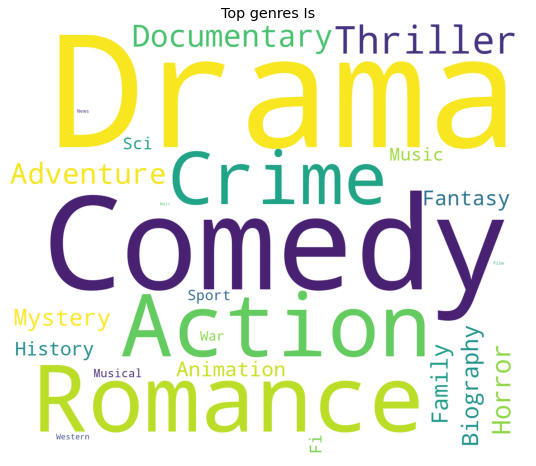

In [512]:
# Let's  plot World Cloud .. 
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres Is')
plt.axis("off")
plt.show()

In [513]:
Counter([i for j in list_of_genres for i in j]).most_common() # orderd by Most Common

[('Drama', 22907),
 ('Comedy', 14981),
 ('Romance', 6706),
 ('Action', 5795),
 ('Crime', 5042),
 ('Thriller', 4736),
 ('Documentary', 4408),
 ('Adventure', 3849),
 ('Horror', 2986),
 ('Mystery', 2393),
 ('Family', 2316),
 ('Biography', 2310),
 ('Fantasy', 1920),
 ('Animation', 1855),
 ('History', 1619),
 ('Music', 1417),
 ('Sci-Fi', 1228),
 ('Sport', 893),
 ('War', 770),
 ('Musical', 535),
 ('Western', 198),
 ('News', 48),
 ('Film-Noir', 41)]

In [514]:

work_df['num_genres'] = work_df['genres_x'].apply(lambda x: len(x.split(",")) if x != {} else 0)
work_df['all_genres'] = work_df['genres_x'].apply(lambda x: ' '.join(sorted(x.split(','))) if x != {} else '')


In [515]:
work_df

,actor,actress,director,producer,genres_x,world_revenue,averageRating,budget,original_language,popularity,production_companies,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres
0,NaN,NaN,nm0895048,nm13054604,Documentary,9685.0,6.8,0.0,ru,0.600,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...",1918-02-27,119.0,7.1,0,0,1,Documentary
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,"Horror,Mystery,Thriller",8811.0,8.0,18000.0,de,13.553,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...",1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,Drama,4272.0,6.5,0.0,no,1.208,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...",1921-12-02,107.0,6.0,0,0,1,Drama
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647","Drama,Romance,War",9183673.0,7.2,0.0,en,3.957,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...",1921-03-06,132.0,7.0,0,0,3,Drama Romance War
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,"Comedy,Drama,Family",41960.0,8.3,250000.0,en,8.892,"[{'id': 1315, 'logo_path': None, 'name': 'Char...",1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,Animation,83857.0,7.0,0.0,ms,0.600,[],2019-05-09,100.0,6.9,0,0,1,Animation
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,"Comedy,Drama",40772.0,6.8,0.0,sv,2.955,"[{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...",2020-02-21,110.0,6.4,0,0,2,Comedy Drama
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619","Comedy,Drama",236880.0,6.6,0.0,fr,5.048,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",2020-07-15,81.0,7.0,0,0,2,Comedy Drama
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785","Action,Crime,Horror",23101.0,6.1,0.0,en,7.997,"[{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...",2019-09-21,92.0,5.9,0,0,3,Action Crime Horror


In [516]:
top_10 = Counter([i for j in list_of_genres for i in j]).most_common(10)
top_10

[('Drama', 22907),
 ('Comedy', 14981),
 ('Romance', 6706),
 ('Action', 5795),
 ('Crime', 5042),
 ('Thriller', 4736),
 ('Documentary', 4408),
 ('Adventure', 3849),
 ('Horror', 2986),
 ('Mystery', 2393)]

In [517]:
top_genres = [i[0] for i in top_10]
top_genres

['Drama',
 'Comedy',
 'Romance',
 'Action',
 'Crime',
 'Thriller',
 'Documentary',
 'Adventure',
 'Horror',
 'Mystery']

In [518]:
for g in top_genres:
    work_df['genre_'+g] = work_df['all_genres'].apply(lambda x : 1 if g in x else 0)

In [519]:
work_df = work_df.drop(['genres_x'], axis=1)

In [520]:
work_df

,actor,actress,director,producer,world_revenue,averageRating,budget,original_language,popularity,production_companies,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery
0,NaN,NaN,nm0895048,nm13054604,9685.0,6.8,0.0,ru,0.600,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...",1918-02-27,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,8811.0,8.0,18000.0,de,13.553,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...",1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,4272.0,6.5,0.0,no,1.208,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...",1921-12-02,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647",9183673.0,7.2,0.0,en,3.957,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...",1921-03-06,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,41960.0,8.3,250000.0,en,8.892,"[{'id': 1315, 'logo_path': None, 'name': 'Char...",1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,83857.0,7.0,0.0,ms,0.600,[],2019-05-09,100.0,6.9,0,0,1,Animation,0,0,0,0,0,0,0,0,0,0
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,40772.0,6.8,0.0,sv,2.955,"[{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...",2020-02-21,110.0,6.4,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619",236880.0,6.6,0.0,fr,5.048,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",2020-07-15,81.0,7.0,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785",23101.0,6.1,0.0,en,7.997,"[{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...",2019-09-21,92.0,5.9,0,0,3,Action Crime Horror,0,0,0,1,1,0,0,0,1,0


# Production companies

In [521]:
work_df['production_companies'] .isna().sum()

0

In [522]:
work_df['production_companies'] = work_df['production_companies'].apply(ast.literal_eval) # extract list from Quote

In [523]:
for i, e in enumerate(work_df['production_companies'][:5]):
    print(i, e)

0 [{'id': 84965, 'logo_path': None, 'name': 'Moscow Cine Committee of the People’s Commissariat of Education', 'origin_country': ''}]
1 [{'id': 55, 'logo_path': None, 'name': 'Decla Film Gesellschaft Holz & Co.', 'origin_country': ''}]
2 [{'id': 70275, 'logo_path': None, 'name': 'Norrøna Film', 'origin_country': ''}, {'id': 70276, 'logo_path': None, 'name': 'Christiana Film', 'origin_country': ''}]
3 [{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2UWvTtXifYEnw.png', 'name': 'Metro Pictures Corporation', 'origin_country': 'US'}]
4 [{'id': 1315, 'logo_path': None, 'name': 'Charles Chaplin Productions', 'origin_country': ''}]


In [524]:
x = work_df['production_companies']
x

0        [{'id': 84965, 'logo_path': None, 'name': 'Mos...
1        [{'id': 55, 'logo_path': None, 'name': 'Decla ...
2        [{'id': 70275, 'logo_path': None, 'name': 'Nor...
3        [{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...
4        [{'id': 1315, 'logo_path': None, 'name': 'Char...
                               ...                        
43146                                                   []
43147    [{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...
43148    [{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...
43149    [{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...
43150    [{'id': 76342, 'logo_path': '/i53Cvs0mWLEhrRaP...
Name: production_companies, Length: 43151, dtype: object

In [525]:
#x[0]['name']

In [526]:
#work_df['production_companies'][0][0]['name']

In [527]:
list_of_companies = list(work_df['production_companies'].apply(lambda x : [i['name'] for i in x] if x != {} else []).values)
list_of_companies

[['Moscow Cine Committee of the People’s Commissariat of Education'],
 ['Decla Film Gesellschaft Holz & Co.'],
 ['Norrøna Film', 'Christiana Film'],
 ['Metro Pictures Corporation'],
 ['Charles Chaplin Productions'],
 ['Decla-Bioscop'],
 ['Prana-Film GmbH', 'Jofa-Atelier Berlin-Johannisthal'],
 ['United Artists', 'Charles Chaplin Productions', 'Regent'],
 ['Comenius-Film GmbH'],
 ['Mosfilm', 'Goskino USSR'],
 ['United Artists', 'Charles Chaplin Productions'],
 ['Gainsborough Pictures', 'Carlyle Blackwell Productions'],
 ['UFA'],
 ['Robert Flaherty Productions Inc.'],
 ['Pathé Consortium Cinéma',
  'Société générale des films',
  'Films Abel Gance',
  'Isepa-Wengeroff Film',
  'Ciné France',
  'Société Westi'],
 ['Fox Film Corporation'],
 ['Metro-Goldwyn-Mayer'],
 ['Paramount Famous Lasky Corporation'],
 ['Nero-Film AG'],
 ['United Artists', 'Charles Chaplin Productions'],
 ['Universal Pictures'],
 ['Société générale des films'],
 ['UFA', 'BIF', 'Himansu Rai Film'],
 ['VUFKU (All-Ukraini

In [528]:
# dummy Column .. Contain only name of company
work_df['all_production_companies'] = work_df['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])))

In [529]:
work_df

,actor,actress,director,producer,world_revenue,averageRating,budget,original_language,popularity,production_companies,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,all_production_companies
0,NaN,NaN,nm0895048,nm13054604,9685.0,6.8,0.0,ru,0.600,"[{'id': 84965, 'logo_path': None, 'name': 'Mos...",1918-02-27,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0,Moscow Cine Committee of the People’s Commissa...
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,8811.0,8.0,18000.0,de,13.553,"[{'id': 55, 'logo_path': None, 'name': 'Decla ...",1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1,Decla Film Gesellschaft Holz & Co.
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,4272.0,6.5,0.0,no,1.208,"[{'id': 70275, 'logo_path': None, 'name': 'Nor...",1921-12-02,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,Christiana Film Norrøna Film
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647",9183673.0,7.2,0.0,en,3.957,"[{'id': 16101, 'logo_path': '/2yI4rjPZ1I7TLZ2U...",1921-03-06,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0,Metro Pictures Corporation
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,41960.0,8.3,250000.0,en,8.892,"[{'id': 1315, 'logo_path': None, 'name': 'Char...",1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0,Charles Chaplin Productions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,83857.0,7.0,0.0,ms,0.600,[],2019-05-09,100.0,6.9,0,0,1,Animation,0,0,0,0,0,0,0,0,0,0,
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,40772.0,6.8,0.0,sv,2.955,"[{'id': 327, 'logo_path': '/vodjjKlAbwGeERPjrA...",2020-02-21,110.0,6.4,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,Avanti Film Film i Väst Nordisk Film Nordsvens...
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619",236880.0,6.6,0.0,fr,5.048,"[{'id': 104, 'logo_path': '/9aotxauvc9685tq9pT...",2020-07-15,81.0,7.0,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,Canal+ Jack N'a Qu'un Oeil Unité de Production
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785",23101.0,6.1,0.0,en,7.997,"[{'id': 6626, 'logo_path': '/A1BnMoWjzjOrjzpWi...",2019-09-21,92.0,5.9,0,0,3,Action Crime Horror,0,0,0,1,1,0,0,0,1,0,Channel 83 Films Fangoria Films Good Wizard Me...


In [530]:
# Let's create column for top 30 production company

#temp_dff['num_companies'] = temp_dff['production_companies'].apply(lambda x: len(x) if x != {} else 0)

top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(10)] #20
for g in top_companies:
    work_df['production_company_' + g] = work_df['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    

work_df = work_df.drop(['production_companies', 'all_production_companies'], axis=1)


In [531]:
work_df

,actor,actress,director,producer,world_revenue,averageRating,budget,original_language,popularity,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema
0,NaN,NaN,nm0895048,nm13054604,9685.0,6.8,0.0,ru,0.600,1918-02-27,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,NaN,8811.0,8.0,18000.0,de,13.553,1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",NaN,NaN,4272.0,6.5,0.0,no,1.208,1921-12-02,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647",9183673.0,7.2,0.0,en,3.957,1921-03-06,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",NaN,NaN,41960.0,8.3,250000.0,en,8.892,1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",NaN,83857.0,7.0,0.0,ms,0.600,2019-05-09,100.0,6.9,0,0,1,Animation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,40772.0,6.8,0.0,sv,2.955,2020-02-21,110.0,6.4,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619",236880.0,6.6,0.0,fr,5.048,2020-07-15,81.0,7.0,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
43149,"nm0002332,nm0006669,nm0004365,nm0184392",NaN,nm3976308,"nm2447772,nm3991275,nm5472785",23101.0,6.1,0.0,en,7.997,2019-09-21,92.0,5.9,0,0,3,Action Crime Horror,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Actor, Actress, Director, Producer

In [532]:
work_df['actor'].isna().sum()

4333

In [533]:
work_df['actress'].isna().sum()

8089

In [534]:
work_df['producer'].isna().sum()

8980

In [535]:
work_df['director'].isna().sum()

2004

In [536]:
work_df['actor'] = work_df['actor'].fillna('{}')
work_df['actress'] = work_df['actress'].fillna('{}')
work_df['director'] = work_df['director'].fillna('{}')
work_df['producer'] = work_df['producer'].fillna('{}')

In [537]:
work_df

,actor,actress,director,producer,world_revenue,averageRating,budget,original_language,popularity,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema
0,{},{},nm0895048,nm13054604,9685.0,6.8,0.0,ru,0.600,1918-02-27,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"nm0470328,nm0891998,nm0270415",nm0196820,nm0927468,{},8811.0,8.0,18000.0,de,13.553,1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,"nm0073680,nm0753185,nm0814027","nm0526192,nm0923198,nm0814028,nm0084841",{},{},4272.0,6.5,0.0,no,1.208,1921-12-02,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"nm0884388,nm0134251,nm0842522",nm0855935,nm0002271,"nm0002206,nm0318647",9183673.0,7.2,0.0,en,3.957,1921-03-06,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"nm0088471,nm0000122,nm0001067,nm0588033,nm0042...","nm0701012,nm0047800,nm0048798",{},{},41960.0,8.3,250000.0,en,8.892,1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,"nm10529307,nm10529308,nm10529309",nm10529306,"nm10529303,nm10529305,nm10529304",{},83857.0,7.0,0.0,ms,0.600,2019-05-09,100.0,6.9,0,0,1,Animation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43147,"nm0489858,nm5048087","nm5329854,nm0256890",nm0459732,nm1199159,40772.0,6.8,0.0,sv,2.955,2020-02-21,110.0,6.4,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43148,"nm2847812,nm4765550","nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619",236880.0,6.6,0.0,fr,5.048,2020-07-15,81.0,7.0,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
43149,"nm0002332,nm0006669,nm0004365,nm0184392",{},nm3976308,"nm2447772,nm3991275,nm5472785",23101.0,6.1,0.0,en,7.997,2019-09-21,92.0,5.9,0,0,3,Action Crime Horror,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [538]:
for i, e in enumerate(work_df['actor'][:5]):
    print(i, e)

0 {}
1 nm0470328,nm0891998,nm0270415
2 nm0073680,nm0753185,nm0814027
3 nm0884388,nm0134251,nm0842522
4 nm0088471,nm0000122,nm0001067,nm0588033,nm0042317,nm0074788,nm0080930


In [539]:
list_of_actor_names = list(work_df['actor'].apply(lambda x: x.split(',') if x != {} else []).values)
list_of_actor_names

[['{}'],
 ['nm0470328', 'nm0891998', 'nm0270415'],
 ['nm0073680', 'nm0753185', 'nm0814027'],
 ['nm0884388', 'nm0134251', 'nm0842522'],
 ['nm0088471',
  'nm0000122',
  'nm0001067',
  'nm0588033',
  'nm0042317',
  'nm0074788',
  'nm0080930'],
 ['nm0324553', 'nm0418079', 'nm0827905'],
 ['nm0775180', 'nm0334603', 'nm0903194'],
 ['nm0312238', 'nm0588033', 'nm0294058', 'nm0579663'],
 ['{}'],
 ['nm0031446', 'nm0058290', 'nm0017893', 'nm0090434'],
 ['nm1027682',
  'nm0000122',
  'nm0841501',
  'nm0615306',
  'nm0074788',
  'nm0906618',
  'nm1033900'],
 ['nm0637040', 'nm0156241'],
 ['nm0002154', 'nm0297054', 'nm0459030'],
 ['nm0845808', 'nm0264390', 'nm0845774', 'nm8006464'],
 ['nm0226387', 'nm0745565', 'nm0885965', 'nm0467916'],
 ['nm0639563'],
 ['nm0151606', 'nm0449908', 'nm0211346'],
 ['nm0736777', 'nm0035159'],
 ['nm0466776', 'nm0496473', 'nm0324501'],
 ['nm0614730',
  'nm0000122',
  'nm0305087',
  'nm0188357',
  'nm0204639',
  'nm0074788',
  'nm0761866',
  'nm0709466'],
 ['nm0891998', 'nm0

In [540]:
Counter([i for j in list_of_actor_names for i in j]).most_common(20)

[('{}', 4333),
 ('nm0000115', 88),
 ('nm0000367', 85),
 ('nm0000134', 82),
 ('nm0000246', 80),
 ('nm0000168', 75),
 ('nm0474774', 72),
 ('nm0465503', 70),
 ('nm0000821', 66),
 ('nm0000353', 66),
 ('nm0000553', 65),
 ('nm0000151', 63),
 ('nm0000131', 62),
 ('nm0000598', 61),
 ('nm0000164', 60),
 ('nm0222426', 59),
 ('nm0000323', 58),
 ('nm0000104', 56),
 ('nm0000172', 54),
 ('nm0000437', 54)]

In [541]:
#work_df['num_cast'] = temp_dff['actor'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_actor_names for i in j]).most_common(20)] #50 # m[0] to return number only
#top_cast_names.remove('{}') 

In [542]:
top_cast_names

['{}',
 'nm0000115',
 'nm0000367',
 'nm0000134',
 'nm0000246',
 'nm0000168',
 'nm0474774',
 'nm0465503',
 'nm0000821',
 'nm0000353',
 'nm0000553',
 'nm0000151',
 'nm0000131',
 'nm0000598',
 'nm0000164',
 'nm0222426',
 'nm0000323',
 'nm0000104',
 'nm0000172',
 'nm0000437']

In [543]:
for g in top_cast_names:
    work_df['actor_name_' + g] = work_df['actor'].apply(lambda x: 1 if g in str(x) else 0)

In [544]:
work_df = work_df.drop(['actor'], axis=1)

In [545]:
work_df

,actress,director,producer,world_revenue,averageRating,budget,original_language,popularity,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437
0,{},nm0895048,nm13054604,9685.0,6.8,0.0,ru,0.600,1918-02-27,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,nm0196820,nm0927468,{},8811.0,8.0,18000.0,de,13.553,1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"nm0526192,nm0923198,nm0814028,nm0084841",{},{},4272.0,6.5,0.0,no,1.208,1921-12-02,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,nm0855935,nm0002271,"nm0002206,nm0318647",9183673.0,7.2,0.0,en,3.957,1921-03-06,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"nm0701012,nm0047800,nm0048798",{},{},41960.0,8.3,250000.0,en,8.892,1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43146,nm10529306,"nm10529303,nm10529305,nm10529304",{},83857.0,7.0,0.0,ms,0.600,2019-05-09,100.0,6.9,0,0,1,Animation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43147,"nm5329854,nm0256890",nm0459732,nm1199159,40772.0,6.8,0.0,sv,2.955,2020-02-21,110.0,6.4,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43148,"nm10529368,nm4166709",nm1315212,"nm1331712,nm3004619",236880.0,6.6,0.0,fr,5.048,2020-07-15,81.0,7.0,0,0,2,Comedy Drama,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43149,{},nm3976308,"nm2447772,nm3991275,nm5472785",23101.0,6.1,0.0,en,7.997,2019-09-21,92.0,5.9,0,0,3,Action Crime Horror,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [546]:
list_of_actress_names = list(work_df['actress'].apply(lambda x: x.split(',') if x != {} else []).values)


In [547]:
top_cast_names = [m[0] for m in Counter([i for j in list_of_actress_names for i in j]).most_common(20)] #50
top_cast_names.remove('{}')

In [548]:
for g in top_cast_names:
    work_df['cast_name_' + g] = work_df['actress'].apply(lambda x: 1 if g in str(x) else 0)

In [549]:
work_df = work_df.drop(['actress'], axis=1)

In [550]:
list_of_producer_names = list(work_df['producer'].apply(lambda x: x.split(',') if x != {} else []).values)
top_cast_names = [m[0] for m in Counter([i for j in list_of_producer_names for i in j]).most_common(20)] #50
top_cast_names.remove('{}')
for g in top_cast_names:
    work_df['producer_name_' + g] = work_df['producer'].apply(lambda x: 1 if g in str(x) else 0)


In [551]:
work_df = work_df.drop(['producer'], axis=1)

In [552]:
list_of_director_names = list(work_df['director'].apply(lambda x: x.split(',') if x != {} else []).values)
top_cast_names = [m[0] for m in Counter([i for j in list_of_director_names for i in j]).most_common(20)] #50
top_cast_names.remove('{}')
for g in top_cast_names:
    work_df['director_name_' + g] = work_df['director'].apply(lambda x: 1 if g in str(x) else 0)

In [553]:
work_df = work_df.drop(['director'], axis=1)

In [554]:
#temp_dff=temp_dff.dropna(subset=['release_date'])

# Revenue

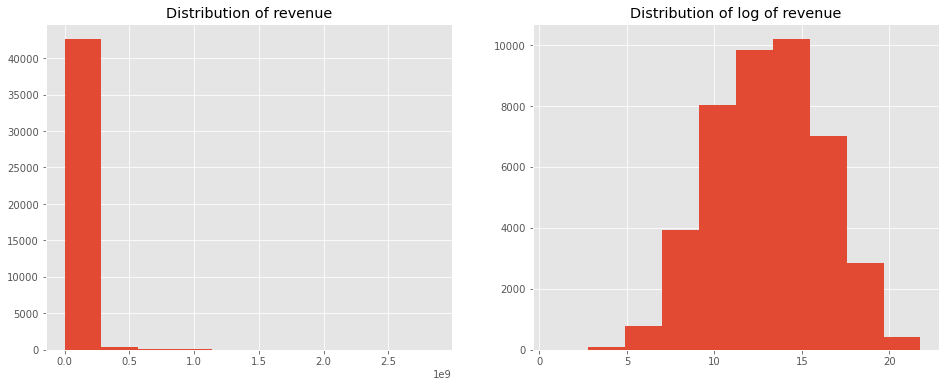

In [555]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(work_df['world_revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(work_df['world_revenue']));
plt.title('Distribution of log of revenue');

In [556]:
# Try to make it close as possible to normal distribution
work_df['log_revenue'] = np.log1p(work_df['world_revenue'])

# Budget

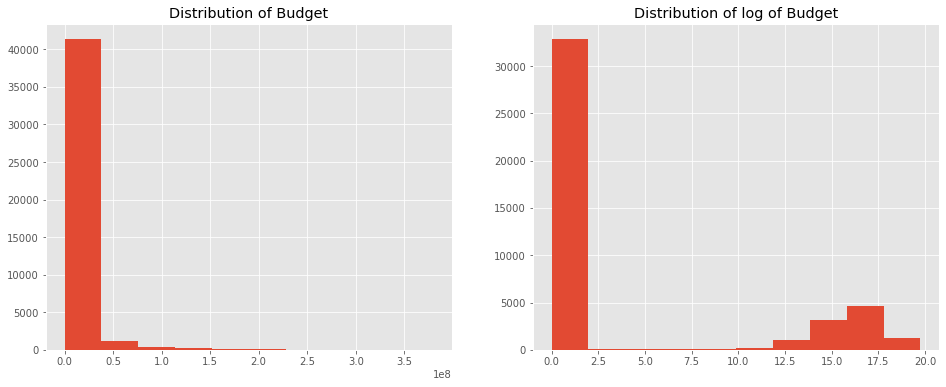

In [557]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(work_df['budget']);
plt.title('Distribution of Budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(work_df['budget']));
plt.title('Distribution of log of Budget');

# Release Date

In [558]:
work_df['release_date'].isna().sum()

76

In [559]:
# Drop rows with nan date
work_df=work_df.dropna(subset=['release_date'])

In [560]:
work_df['release_date'] = pd.to_datetime(work_df['release_date'])

In [561]:
def process_date(df):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int) # corresponding to pandas date time
    
    return df

work_df = process_date(work_df)


<ipython-input-561-fcdca45bf3d5>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df[part_col] = getattr(df['release_date'].dt, part).astype(int) # corresponding to pandas date time


In [562]:
work_df

,world_revenue,averageRating,budget,original_language,popularity,release_date,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,9685.0,6.8,0.0,ru,0.600,1918-02-27,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.178437,1918,2,2,9,27,1
1,8811.0,8.0,18000.0,de,13.553,1920-02-27,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.083870,1920,4,2,9,27,1
2,4272.0,6.5,0.0,no,1.208,1921-12-02,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.360071,1921,4,12,48,2,4
3,9183673.0,7.2,0.0,en,3.957,1921-03-06,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.032938,1921,6,3,9,6,1
4,41960.0,8.3,250000.0,en,8.892,1921-01-21,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.644496,1921,4,1,3,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [563]:
work_df = work_df.drop(['release_date'], axis=1)


# Original language

In [564]:
work_df['original_language'].isna().sum()

0

In [565]:
l = list(work_df['original_language'].fillna(''))

In [566]:
le = LabelEncoder()
le.fit(l) 
work_df['original_language'] = le.transform(work_df['original_language'].fillna('').astype(str))

# collection name

In [567]:
work_df

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,9685.0,6.8,0.0,76,0.600,119.0,7.1,0,0,1,Documentary,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.178437,1918,2,2,9,27,1
1,8811.0,8.0,18000.0,17,13.553,77.0,8.0,0,0,3,Horror Mystery Thriller,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.083870,1920,4,2,9,27,1
2,4272.0,6.5,0.0,68,1.208,107.0,6.0,0,0,1,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.360071,1921,4,12,48,2,4
3,9183673.0,7.2,0.0,20,3.957,132.0,7.0,0,0,3,Drama Romance War,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.032938,1921,6,3,9,6,1
4,41960.0,8.3,250000.0,20,8.892,53.0,8.2,0,0,3,Comedy Drama Family,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.644496,1921,4,1,3,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [568]:
l = list(work_df['collection_name'].fillna(''))

In [569]:
le = LabelEncoder()
le.fit(l) 
work_df['collection_name'] = le.transform(work_df['collection_name'].fillna('').astype(str))

In [570]:
# Just drop all geners
work_df = work_df.drop(['all_genres'], axis=1)


In [571]:
work_df

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,9685.0,6.8,0.0,76,0.600,119.0,7.1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.178437,1918,2,2,9,27,1
1,8811.0,8.0,18000.0,17,13.553,77.0,8.0,0,0,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.083870,1920,4,2,9,27,1
2,4272.0,6.5,0.0,68,1.208,107.0,6.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.360071,1921,4,12,48,2,4
3,9183673.0,7.2,0.0,20,3.957,132.0,7.0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.032938,1921,6,3,9,6,1
4,41960.0,8.3,250000.0,20,8.892,53.0,8.2,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.644496,1921,4,1,3,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

#  Eda Section

# More of suggestion about budget


In [572]:
work_df[work_df['budget']==0]

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,9685.0,6.8,0.0,76,0.600,119.0,7.1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.178437,1918,2,2,9,27,1
2,4272.0,6.5,0.0,68,1.208,107.0,6.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.360071,1921,4,12,48,2,4
3,9183673.0,7.2,0.0,20,3.957,132.0,7.0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.032938,1921,6,3,9,6,1
5,12156.0,7.6,0.0,17,5.003,105.0,7.5,0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.405660,1921,3,10,40,6,4
6,19054.0,7.9,0.0,17,15.336,94.0,7.7,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.855085,1922,3,2,7,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [573]:
null_budget_columns = work_df[work_df.budget == 0]
null_budget_columns.drop(columns='budget', axis=1, inplace=True)

C:\Users\Noweto\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [574]:
null_budget_columns

,world_revenue,averageRating,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,9685.0,6.8,76,0.600,119.0,7.1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.178437,1918,2,2,9,27,1
2,4272.0,6.5,68,1.208,107.0,6.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.360071,1921,4,12,48,2,4
3,9183673.0,7.2,20,3.957,132.0,7.0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.032938,1921,6,3,9,6,1
5,12156.0,7.6,17,5.003,105.0,7.5,0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.405660,1921,3,10,40,6,4
6,19054.0,7.9,17,15.336,94.0,7.7,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.855085,1922,3,2,7,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [575]:
train_budget_columns = work_df[work_df.budget != 0]

In [576]:
train_budget_columns.shape

(10347, 114)

In [577]:
train_budget_columns.isna().sum()

world_revenue              0
averageRating              0
budget                     0
original_language          0
popularity                 0
                          ..
release_date_weekday       0
release_date_month         0
release_date_weekofyear    0
release_date_day           0
release_date_quarter       0
Length: 114, dtype: int64

In [578]:
X = train_budget_columns.drop("budget", axis=1).values
y = train_budget_columns.budget.values

In [579]:
X[0]

array([8.81100000e+03, 8.00000000e+00, 1.70000000e+01, 1.35530000e+01,
       7.70000000e+01, 8.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [580]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [581]:
y[0]

18000.0

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [583]:
from xgboost import XGBRFRegressor
model = XGBRFRegressor(objective = "reg:linear", max_deepth=15, seed=100, n_estimators=100, bosster = "gblinear")


In [584]:
model.fit(X_train, y_train)

[00:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "bosster", "max_deepth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRFRegressor(base_score=0.5, booster='gbtree', bosster='gblinear',
               callbacks=None, colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_deepth=15, max_delta_step=0,
               max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=0,
               num_parallel_tree=100, objective='reg:linear', predictor='auto',
               random_state=100, reg_alpha=0, ...)

In [585]:
model.score(X_train, y_train)

0.7828513661725764

In [586]:
model.score(X_test, y_test)

0.768241039100076

In [587]:
predictions = model.predict(null_budget_columns.values)

In [588]:
null_budget_columns = work_df[work_df.budget == 0]

In [589]:
null_budget_columns.budget = predictions

C:\Users\Noweto\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [590]:
null_budget_columns[:5]

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
0,9685.0,6.8,168171200.0,76,0.600,119.0,7.1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.178437,1918,2,2,9,27,1
2,4272.0,6.5,168171200.0,68,1.208,107.0,6.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.360071,1921,4,12,48,2,4
3,9183673.0,7.2,171115184.0,20,3.957,132.0,7.0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.032938,1921,6,3,9,6,1
5,12156.0,7.6,171115184.0,17,5.003,105.0,7.5,0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.405660,1921,3,10,40,6,4
6,19054.0,7.9,171115184.0,17,15.336,94.0,7.7,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.855085,1922,3,2,7,16,1


In [591]:
train_budget_columns[:5]

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
1,8811.0,8.0,18000.0,17,13.553,77.0,8.0,0,0,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.083870,1920,4,2,9,27,1
4,41960.0,8.3,250000.0,20,8.892,53.0,8.2,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.644496,1921,4,1,3,21,1
10,26975.0,8.2,923000.0,20,11.394,89.0,8.0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.202703,1925,6,7,28,12,3
12,1349711.0,8.3,1300000.0,17,17.700,149.0,8.2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.115402,1927,6,2,5,6,1
16,4841.0,7.8,217000.0,20,7.782,50.0,7.7,0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.485083,1927,6,5,21,29,2


In [592]:
final_work_df = pd.concat([train_budget_columns, null_budget_columns], axis=0)

In [593]:
final_work_df

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,log_revenue,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
1,8811.0,8.0,18000.0,17,13.553,77.0,8.0,0,0,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.083870,1920,4,2,9,27,1
4,41960.0,8.3,250000.0,20,8.892,53.0,8.2,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.644496,1921,4,1,3,21,1
10,26975.0,8.2,923000.0,20,11.394,89.0,8.0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.202703,1925,6,7,28,12,3
12,1349711.0,8.3,1300000.0,17,17.700,149.0,8.2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.115402,1927,6,2,5,6,1
16,4841.0,7.8,217000.0,20,7.782,50.0,7.7,0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.485083,1927,6,5,21,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [594]:
#final_work_df = final_work_df.drop(columns=['log_budget'],axis = 1)  # Running .... but not now

In [595]:
final_work_df = final_work_df.drop(columns=['log_revenue'],axis = 1) 

In [596]:
final_work_df

,world_revenue,averageRating,budget,original_language,popularity,runtime,vote_average,collection_name,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Romance,genre_Action,genre_Crime,genre_Thriller,genre_Documentary,genre_Adventure,genre_Horror,genre_Mystery,production_company_Warner Bros. Pictures,production_company_Universal Pictures,production_company_Canal+,production_company_Paramount,production_company_Columbia Pictures,production_company_20th Century Fox,production_company_CNC,production_company_France 2 Cinéma,production_company_Metro-Goldwyn-Mayer,production_company_New Line Cinema,actor_name_{},actor_name_nm0000115,actor_name_nm0000367,actor_name_nm0000134,actor_name_nm0000246,actor_name_nm0000168,actor_name_nm0474774,actor_name_nm0465503,actor_name_nm0000821,actor_name_nm0000353,actor_name_nm0000553,actor_name_nm0000151,actor_name_nm0000131,actor_name_nm0000598,actor_name_nm0000164,actor_name_nm0222426,actor_name_nm0000323,actor_name_nm0000104,actor_name_nm0000172,actor_name_nm0000437,cast_name_nm0000215,cast_name_nm0000194,cast_name_nm0000366,cast_name_nm0000173,cast_name_nm0000658,cast_name_nm0001376,cast_name_nm0000300,cast_name_nm0000545,cast_name_nm0000473,cast_name_nm0000244,cast_name_nm0000201,cast_name_nm0001057,cast_name_nm0000949,cast_name_nm0000210,cast_name_nm0915208,cast_name_nm0000234,cast_name_nm0895759,cast_name_nm0000218,cast_name_nm0004626,producer_name_nm0079677,producer_name_nm0216635,producer_name_nm0104418,producer_name_nm0748784,producer_name_nm0380547,producer_name_nm0271479,producer_name_nm0783652,producer_name_nm0698271,producer_name_nm0089658,producer_name_nm0157692,producer_name_nm0004976,producer_name_nm0015528,producer_name_nm0256542,producer_name_nm1024685,producer_name_nm0303922,producer_name_nm0586969,producer_name_nm0592945,producer_name_nm0215842,producer_name_nm8847729,director_name_nm0586281,director_name_nm0000229,director_name_nm0946875,director_name_nm0000217,director_name_nm0939147,director_name_nm0001752,director_name_nm0935863,director_name_nm0000631,director_name_nm0000165,director_name_nm0864775,director_name_nm0393254,director_name_nm0516360,director_name_nm0001486,director_name_nm0000095,director_name_nm0001469,director_name_nm0000419,director_name_nm0001708,director_name_nm0000915,director_name_nm0161152,release_date_year,release_date_weekday,release_date_month,release_date_weekofyear,release_date_day,release_date_quarter
1,8811.0,8.0,18000.0,17,13.553,77.0,8.0,0,0,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1920,4,2,9,27,1
4,41960.0,8.3,250000.0,20,8.892,53.0,8.2,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1921,4,1,3,21,1
10,26975.0,8.2,923000.0,20,11.394,89.0,8.0,0,0,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1925,6,7,28,12,3
12,1349711.0,8.3,1300000.0,17,17.700,149.0,8.2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1927,6,2,5,6,1
16,4841.0,7.8,217000.0,20,7.782,50.0,7.7,0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1927,6,5,21,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [597]:
#mean_value=df['budget'].mean()
#work_df[work_df['budget']==0] = mean_value

#temp_dff = temp_dff.drop(temp_dff[temp_dff['budget'] == 0].index)

In [598]:
X = final_work_df.drop(['world_revenue'], axis=1)
y = final_work_df['world_revenue']


In [599]:
from scipy.sparse import csr_matrix

X_ = csr_matrix(X.values)



In [600]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y, test_size=0.1)

In [601]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,random_state=51 , bootstrap = True,
 max_depth= None,
 max_features = 'auto',
 min_samples_leaf = 7,
 min_samples_split= 5,
 n_estimators = 1000)

In [602]:
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=7, min_samples_split=5,
                      n_estimators=1000, n_jobs=-1, random_state=51)

In [603]:
model.score(X_train,y_train)

0.8267905386467134

In [604]:
model.score(X_valid,y_valid)

0.7583282493395409

In [605]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(model.predict(X_train),y_train)**0.5

2.3534526273305474

In [606]:
mean_squared_log_error(model.predict(X_valid),y_valid)**0.5

2.5247285910199606

In [607]:
# Regressor
#model2 = XGBRFRegressor(objective = "reg:linear", max_deepth=15, seed=100, n_estimators=100, bosster = "gblinear")

In [608]:
#model2.fit(X_train, y_train)

In [609]:
#model2.score(X_train,y_train)

In [610]:
#model2.score(X_valid,y_valid)

In [611]:
# normal Random forest

In [612]:
for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

averageRating = 0.04222402967446344
budget = 0.22717903737496745
original_language = 0.013789449679694634
popularity = 0.39563276357541644
runtime = 0.10375265537157667
vote_average = 0.0115337098899433
collection_name = 0.04103143170302794
has_collection = 0.004007504942193532
num_genres = 0.0008216103210907961
genre_Drama = 0.0012186913062637058
genre_Comedy = 0.002713587429254617
genre_Romance = 0.0008177451962641132
genre_Action = 0.0013406276012144843
genre_Crime = 0.0002591410589045903
genre_Thriller = 0.00038784236450282273
genre_Documentary = 4.172304378580413e-05
genre_Adventure = 0.08143435639149439
genre_Horror = 0.00010892667329183294
genre_Mystery = 0.00021093709345869157
production_company_Warner Bros. Pictures = 0.0009987837861278966
production_company_Universal Pictures = 0.0011718038740530711
production_company_Canal+ = 4.279648531218121e-06
production_company_Paramount = 0.0013378194332969422
production_company_Columbia Pictures = 0.0002073880035285815
production_comp